In [117]:
# example of a super learner model for regression
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression,make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,mean_squared_error,confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [118]:
X,y = make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,n_classes=3,random_state=0)
X, X_val, y, y_val = train_test_split(X, y, test_size=0.30)

In [119]:
kfold = KFold(n_splits=10,shuffle=True,random_state=0)
clf = DecisionTreeClassifier()
avg_acc = 0
for train,test in kfold.split(X):
    X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    avg_acc += accuracy_score(y_test, y_pred)
print(avg_acc / 10.)

0.7657142857142857


In [120]:
clf = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf.fit(X,y)
clf2.fit(X,y)

RandomForestClassifier()

0.8133333333333334


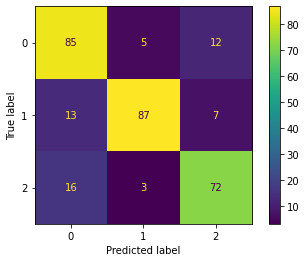

In [123]:
pred = clf.predict(X_val)
print(accuracy_score(y_val, pred))
cm = confusion_matrix(y_val, pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()